In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

from sklearn.model_selection import train_test_split

import os
os.listdir("./Dataset/MyDataset/")

['dataset.csv', 'images', 'images_old', 'leaves.zip']

In [2]:
folder_dataset ="./Dataset/MyDataset/images/"

data_df = pd.DataFrame({'filename':os.listdir(folder_dataset)})
data_df['leaf'] = [filename.split('_')[0] for filename in data_df['filename']]
data_df['label'] = [filename.split('_')[1] for filename in data_df['filename']]

data_df.leaf = data_df.leaf.astype(int)
data_df.label = data_df.label.astype(int)

n_leaf = data_df.leaf.unique().shape[0]

print(data_df.shape)
data_df.head()

(619, 3)


,filename,leaf,label
0,10_0_0.jpg,10,0
1,10_0_1.jpg,10,0
2,10_0_10.jpg,10,0
3,10_0_11.jpg,10,0
4,10_0_12.jpg,10,0


In [3]:
data_df.to_csv('./Dataset/Mydataset/dataset.csv', index=False)

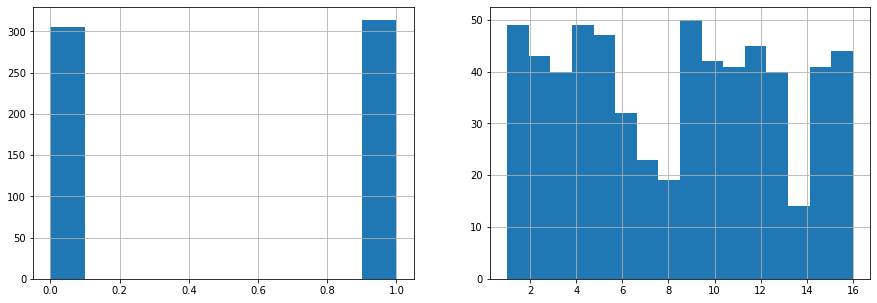

In [4]:
# All dataset
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data_df.label.hist()
plt.subplot(1,2,2)
data_df.leaf.hist(bins=n_leaf)

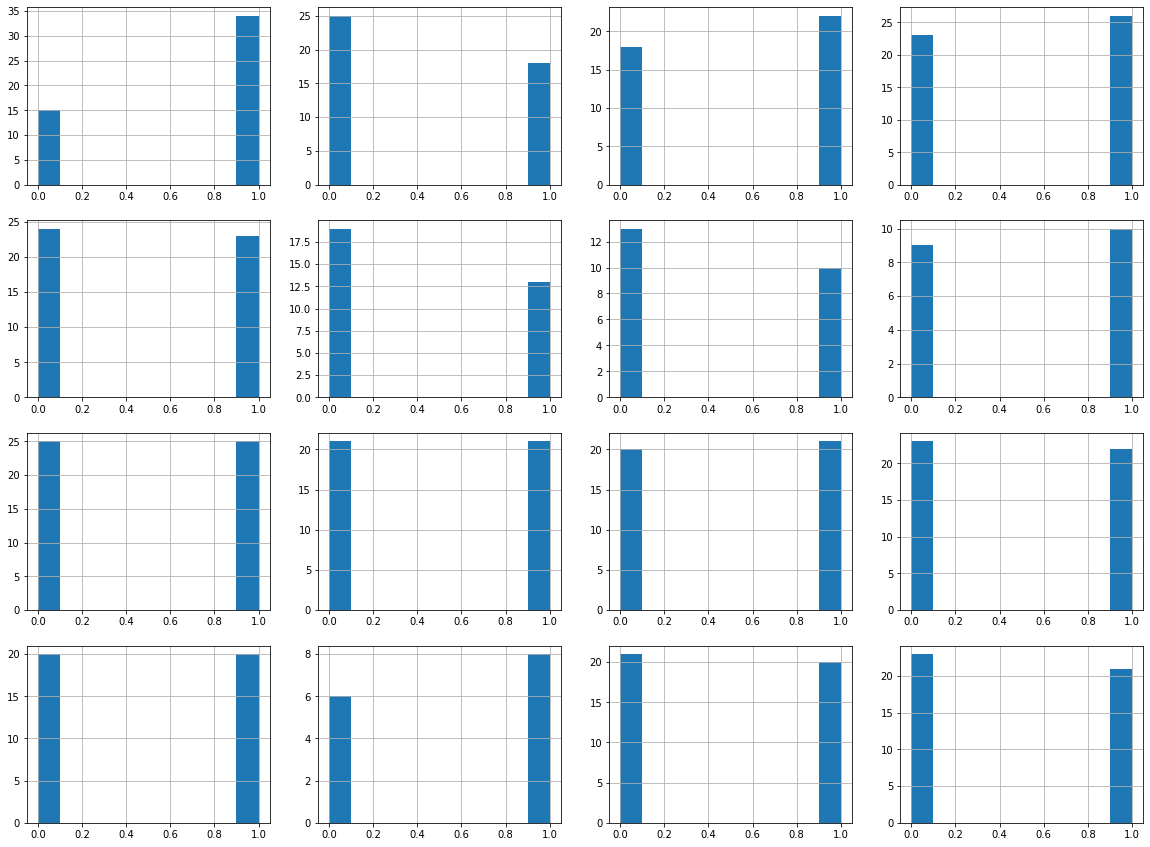

In [5]:
plt.figure(figsize=(20, 15))
for i in range(n_leaf):
    plt.subplot(n_leaf/4, 4, i+1)
    data_df[data_df.leaf == i+1].label.hist()

In [6]:
train_df, test_df = train_test_split(data_df, random_state=2, test_size=0.4)
test_df, valid_df = train_test_split(test_df, random_state=2, test_size=0.5)

print('Train:', train_df.shape)
print('Valid:', valid_df.shape)
print('Test:', test_df.shape)

Train: (371, 3)
Valid: (124, 3)
Test: (124, 3)


In [7]:
# train_df.to_csv("./Dataset/MyDataset/train.csv")
# test_df.to_csv("./Dataset/MyDataset/test.csv")
# valid_df.to_csv("./Dataset/MyDataset/valid.csv")

In [8]:
image_path = "./Dataset/MyDataset/images/"
data_df['path'] = [image_path + filename for filename in data_df.filename]

data_df

,filename,leaf,label,path
0,10_0_0.jpg,10,0,./Dataset/MyDataset/image/10_0_0.jpg
1,10_0_1.jpg,10,0,./Dataset/MyDataset/image/10_0_1.jpg
2,10_0_10.jpg,10,0,./Dataset/MyDataset/image/10_0_10.jpg
3,10_0_11.jpg,10,0,./Dataset/MyDataset/image/10_0_11.jpg
4,10_0_12.jpg,10,0,./Dataset/MyDataset/image/10_0_12.jpg
...,...,...,...,...
614,9_1_5.jpg,9,1,./Dataset/MyDataset/image/9_1_5.jpg
615,9_1_6.jpg,9,1,./Dataset/MyDataset/image/9_1_6.jpg
616,9_1_7.jpg,9,1,./Dataset/MyDataset/image/9_1_7.jpg
617,9_1_8.jpg,9,1,./Dataset/MyDataset/image/9_1_8.jpg
